In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("C:/Users/TIYANI/Videos/Final/Geometallurgy.csv")

In [3]:
df.head()

,Hole_Id,Depth_From,Depth_To,Bond Work Index,Abression Index,Rodmill Index,Drop Weight index,RQD,AxB,target
0,KRED207,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,KRED207,10.0,14.0,10.3,0.32,13.7,21.0,45.00,0.67,1
2,KRED207,14.0,17.2,12.0,0.02,13.8,16.0,54.74,0.32,1
3,KRED207,17.2,27.0,12.0,0.02,13.8,16.0,54.74,0.32,1
4,KRED207,27.0,31.2,12.0,0.02,13.8,16.0,54.74,0.32,1


In [4]:
df.shape

(1122, 10)

In [5]:
df.isna().any()

Hole_Id              False
Depth_From           False
Depth_To             False
Bond Work Index       True
Abression Index       True
Rodmill Index         True
Drop Weight index     True
RQD                   True
AxB                   True
target               False
dtype: bool

In [6]:
df.dropna(subset=['Abression Index'], how='all', inplace=True)

In [7]:
df.isna().any()

Hole_Id              False
Depth_From           False
Depth_To             False
Bond Work Index      False
Abression Index      False
Rodmill Index        False
Drop Weight index    False
RQD                  False
AxB                  False
target               False
dtype: bool

In [11]:
df.drop(columns='target', axis=1, inplace=True)

In [8]:
df.drop(columns='Hole_Id', axis=1, inplace=True)

In [9]:
sns.set_style("white")
sns.set(rc={"axes.facecolor":"#e9bb93", "figure.facecolor":"#e9bb93",
            "axes.grid":True, "grid.color":"white", "axes.edgecolor":"black",
            "grid.linestyle": u"-", "axes.labelcolor": "black", "font.family": [u"DejaVu Sans"],
            "text.color": "black", "xtick.color": "black", "ytick.color": "black",
            "legend.facecolor":"#e9bb93", "legend.frameon": True, "legend.edgecolor":"black"})
sns.set_context("poster",font_scale = .7)

palette = ["#272716","#6c2411","#ae0d13","#cc3f18","#db6400"]
palette_cmap = ["#272716","#6c2411","#cc3f18","#db6400","#ae0d13"]

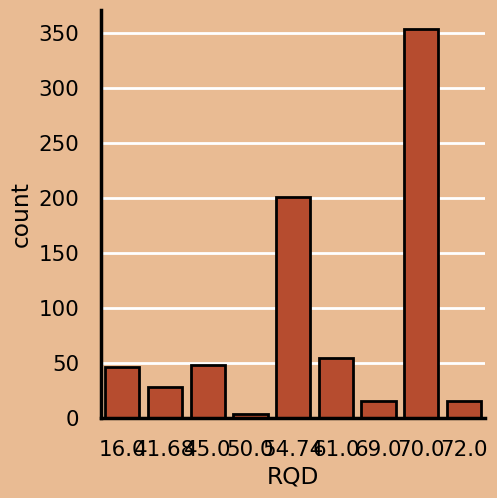

In [10]:
sns.catplot(x="RQD", kind="count", data=df, color=palette_cmap[2], edgecolor="black")

In [12]:
X = df.iloc[:, :].values

In [13]:
X

array([[10.  , 14.  , 10.3 , ..., 21.  , 45.  ,  0.67],
       [14.  , 17.2 , 12.  , ..., 16.  , 54.74,  0.32],
       [17.2 , 27.  , 12.  , ..., 16.  , 54.74,  0.32],
       ...,
       [49.8 , 78.5 , 14.3 , ..., 11.3 , 70.  , 41.1 ],
       [78.5 , 81.4 , 14.3 , ..., 11.3 , 70.  , 41.1 ],
       [81.4 , 92.  , 14.3 , ..., 11.3 , 70.  , 41.1 ]])

In [14]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [15]:
wcss

[4151768.736677167,
 1564732.6167698395,
 998726.7367930176,
 784328.1315089765,
 642479.7416257011,
 545759.8585202256,
 449127.76564612775,
 385164.3165004322,
 346686.59617351595,
 308232.8517312732]

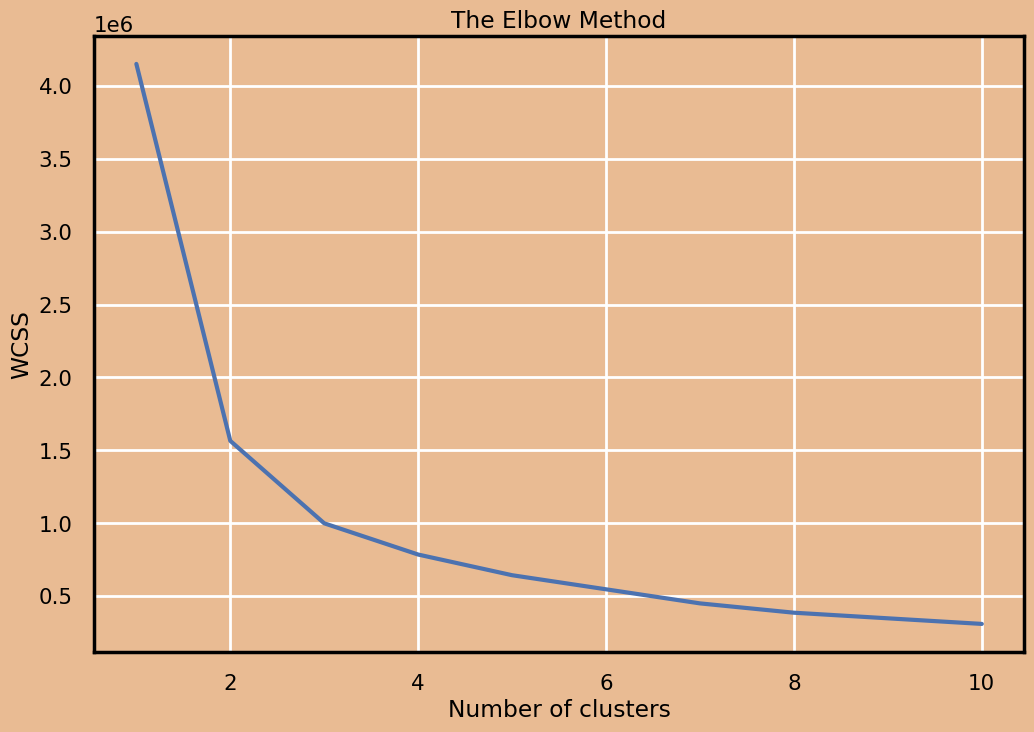

In [16]:
plt.figure(figsize=(12,8))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [18]:
kmeans.cluster_centers_

array([[1.17142331e+02, 1.26935276e+02, 1.38104294e+01, 5.59453988e-01,
        1.68717791e+01, 1.23527607e+01, 6.36067485e+01, 2.85719018e+01],
       [6.41372180e+01, 7.44759398e+01, 1.42398496e+01, 7.58270677e-01,
        1.87646617e+01, 1.12398496e+01, 7.00827068e+01, 4.02406015e+01],
       [1.67010204e+02, 1.76295408e+02, 1.42183673e+01, 6.98561224e-01,
        1.81632653e+01, 1.14561224e+01, 6.80318367e+01, 3.68467347e+01],
       [2.61596244e+01, 3.43615023e+01, 1.34807512e+01, 2.44018779e-01,
        1.33896714e+01, 1.31676056e+01, 5.37339906e+01, 9.74920657e+00],
       [7.25363057e+01, 8.04391720e+01, 1.33038217e+01, 1.10522293e-01,
        1.18464968e+01, 1.37445860e+01, 4.83020382e+01, 1.75554777e+00]])

TypeError: 'KMeans' object is not subscriptable

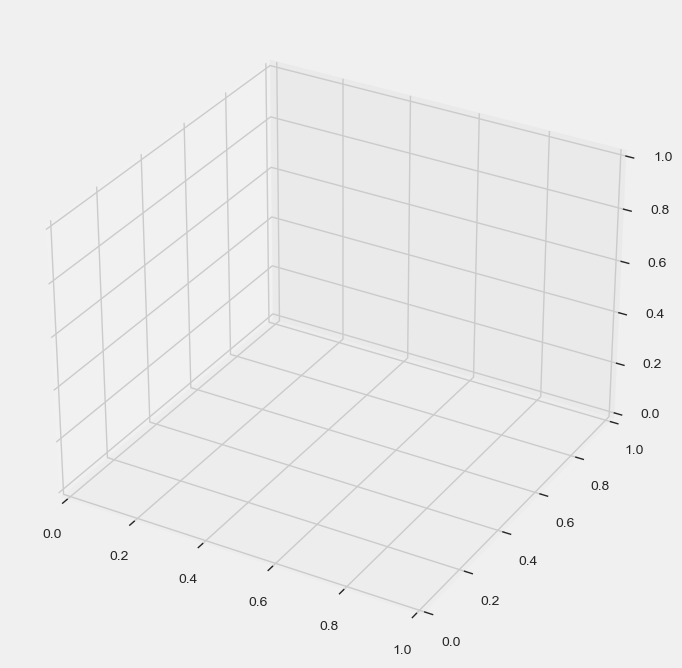

In [64]:
color = colors.ListedColormap(["#FA3308", "#B4FA08", "#08F3FA", "#7D5B89"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=kmeans["Clusters"], marker='o',cmap=color )
ax.set_title("The Plot Of The Clusters")
plt.show()

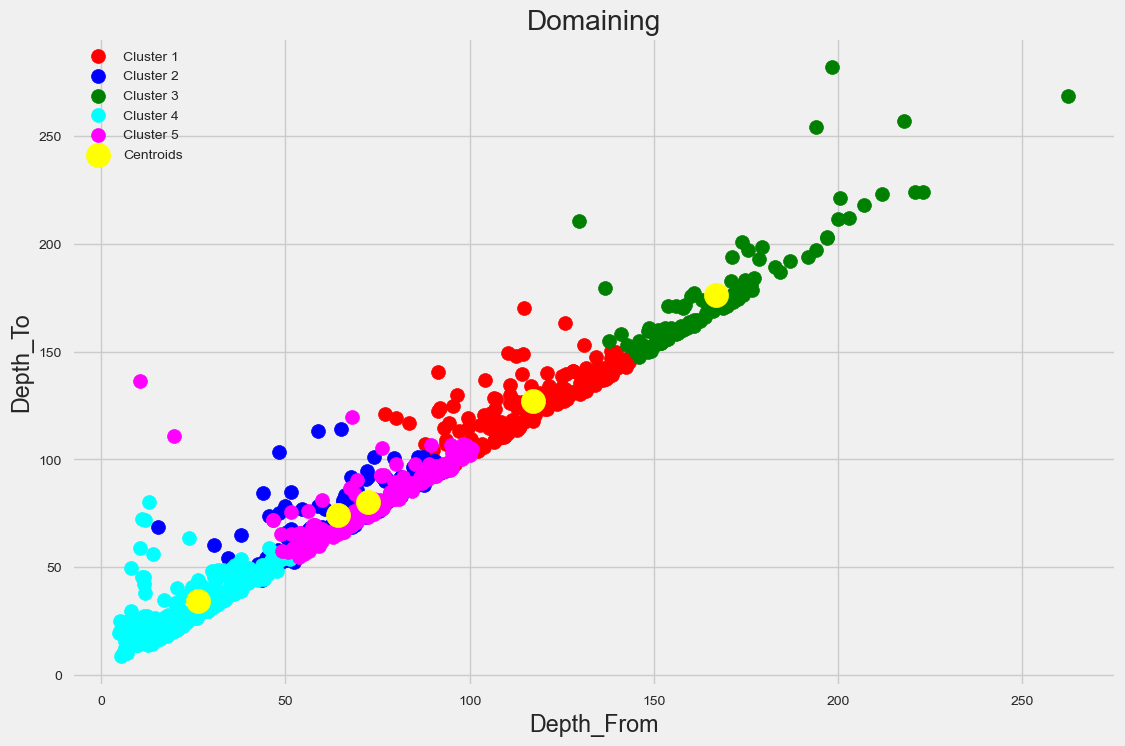

In [58]:
plt.figure(figsize=(12,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Domaining')
plt.xlabel('Depth_From')
plt.ylabel('Depth_To')
plt.legend()
plt.show()

In [24]:
from sklearn.decomposition import PCA

In [25]:
# We will now reduce the data to 3 features for clarity and clustering using PCA.
pca = PCA(n_components = 3)
pca.fit(df)
PCA_Dataset = pd.DataFrame(pca.transform(df), columns = (["col_1", "col_2", "col_3"]))
PCA_Dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,764.0,-1.319828e-14,69.576480,-111.076230,-58.065859,-11.527406,48.411570,256.749748
col_2,764.0,-3.710819e-15,21.063680,-37.663208,-18.121813,3.446189,15.591272,57.120382
col_3,764.0,-6.885708e-15,9.448808,-13.509825,-7.051227,-1.355181,3.178137,73.260708


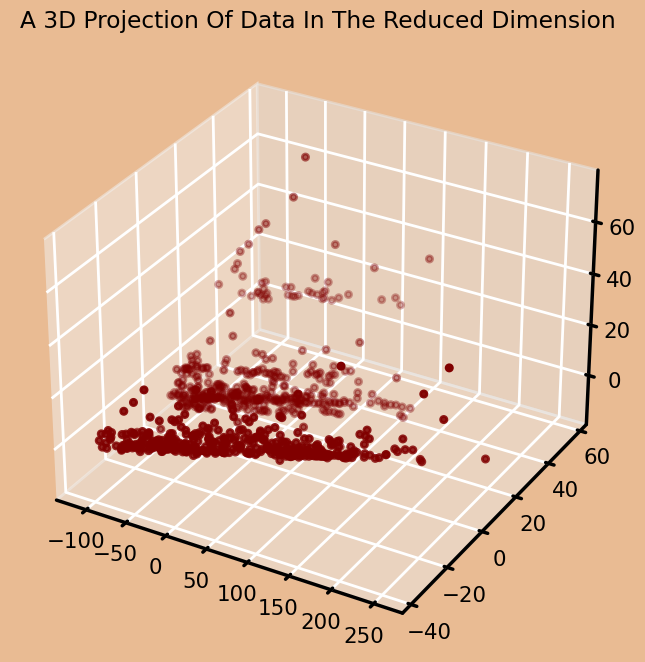

In [26]:
x =PCA_Dataset["col_1"]
y =PCA_Dataset["col_2"]
z =PCA_Dataset["col_3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

In [29]:
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.neighbors import NearestNeighbors
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.express as px

Elbow Method to determine the number of clusters to be formed:


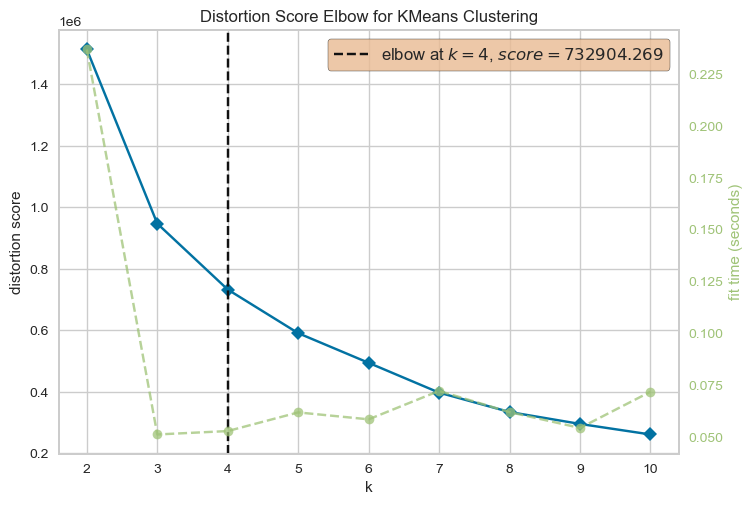

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_Dataset)
Elbow_M.show()

In [31]:
list=[]
for k in range (1,11):
    Model = KMeans(n_clusters = k, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 42)
    Model.fit(PCA_Dataset)
    list.append(Model.inertia_)

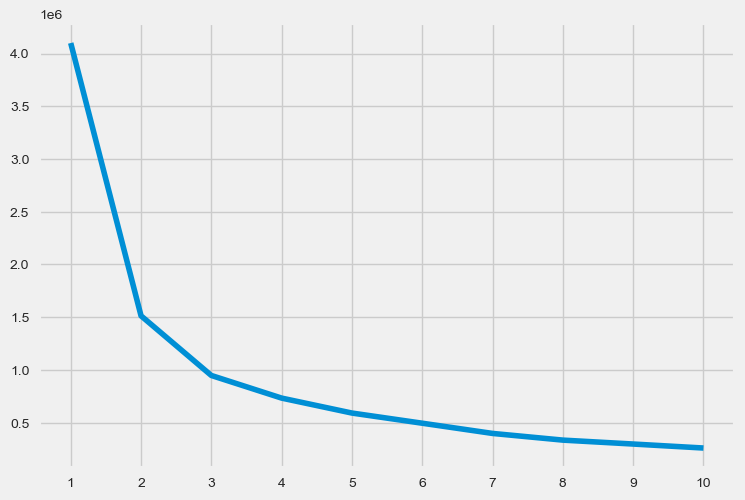

In [32]:
plt.style.use('fivethirtyeight')
plt.plot(range(1,11),list)
plt.xticks(range(1,11))
plt.show()

In [34]:
from scipy.cluster import hierarchy

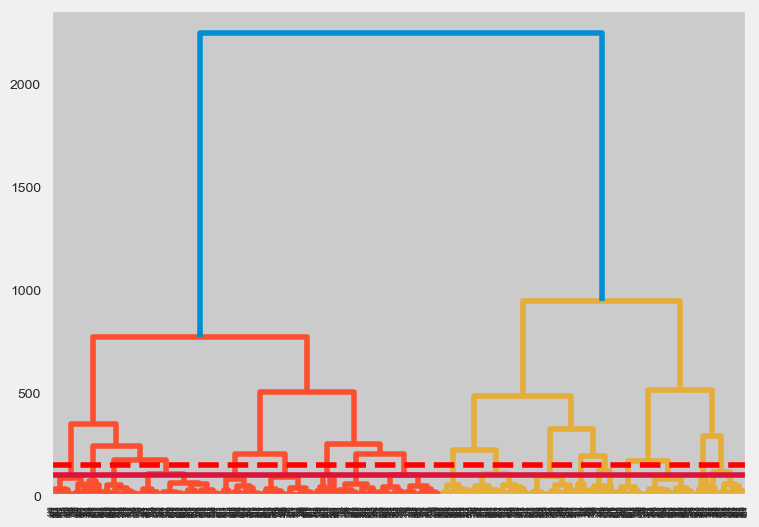

In [35]:
clusters = hierarchy.linkage(PCA_Dataset, method="ward")

plt.figure(figsize=(8, 6))
dendrogram = hierarchy.dendrogram(clusters)
# Plotting a horizontal line based on the first biggest distance between clusters 
plt.axhline(150, color='red', linestyle='--'); 
# Plotting a horizontal line based on the second biggest distance between clusters 
plt.axhline(100, color='crimson');

In [36]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering
import datetime

In [39]:
ACModel = AgglomerativeClustering(n_clusters=4)
ypred_AC = ACModel.fit_predict(PCA_Dataset)
PCA_Dataset["Clusters"] = ypred_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= ypred_AC
print(f"The silhouette score for the current model is: {silhouette_score(PCA_Dataset, ypred_AC)}")

The silhouette score for the current model is: 0.3559758839535304


In [41]:
from matplotlib import colors

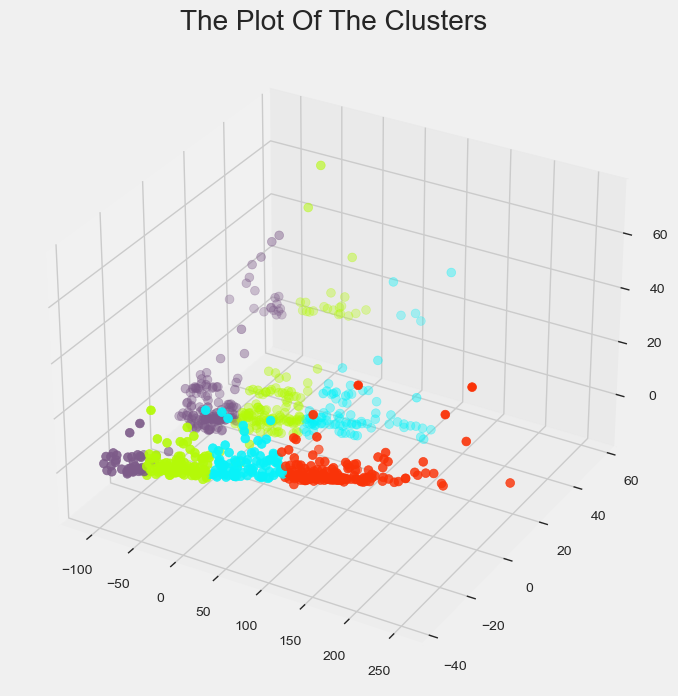

In [42]:
color = colors.ListedColormap(["#FA3308", "#B4FA08", "#08F3FA", "#7D5B89"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_Dataset["Clusters"], marker='o',cmap=color )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [43]:
Kmean_model= KMeans(n_clusters = 4, init = 'k-means++', n_init = 10, max_iter = 300, random_state = 42)
ypred_kmean=Kmean_model.fit_predict(PCA_Dataset)
PCA_Dataset["Clusters"] = ypred_kmean
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= ypred_kmean

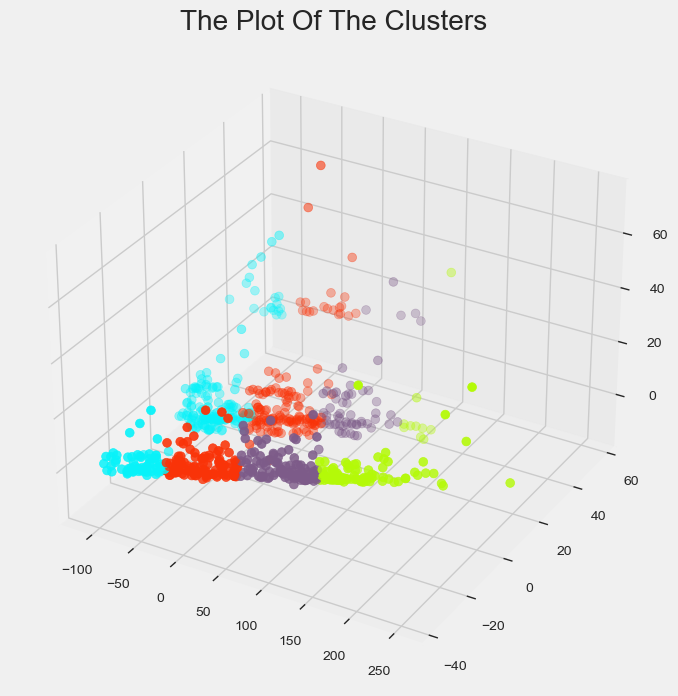

In [44]:
color = colors.ListedColormap(["#FA3308", "#B4FA08", "#08F3FA", "#7D5B89"])
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_Dataset["Clusters"], marker='o',cmap=color )
ax.set_title("The Plot Of The Clusters")
plt.show()

In [45]:
neighbors = NearestNeighbors(n_neighbors = 4) 
nbrs = neighbors.fit(PCA_Dataset) 
distances, indices = nbrs.kneighbors(PCA_Dataset) 

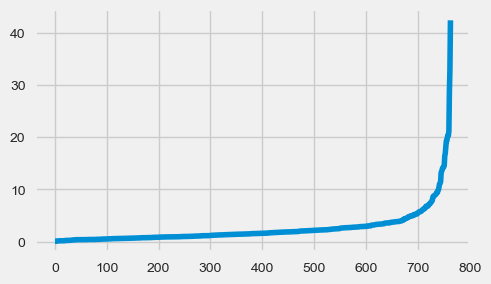

In [46]:
distances = np.sort(distances, axis = 0) 
distances = distances[:, 1] 
plt.rcParams['figure.figsize'] = (5,3) 
plt.plot(distances) 
plt.show()

In [50]:
dbscan_pca_scale = DBSCAN(eps=1, min_samples=1, metric="euclidean").fit(PCA_Dataset)
print('DBSCAN PCA Scaled Silhouette Score: {}'.format(silhouette_score(PCA_Dataset, dbscan_pca_scale.labels_, metric='euclidean')))
labels_pca_scale = dbscan_pca_scale.labels_
clusters_pca_scale = pd.concat([PCA_Dataset, pd.DataFrame({'pca_clusters':labels_pca_scale})], axis=1)

DBSCAN PCA Scaled Silhouette Score: 0.194810243009829


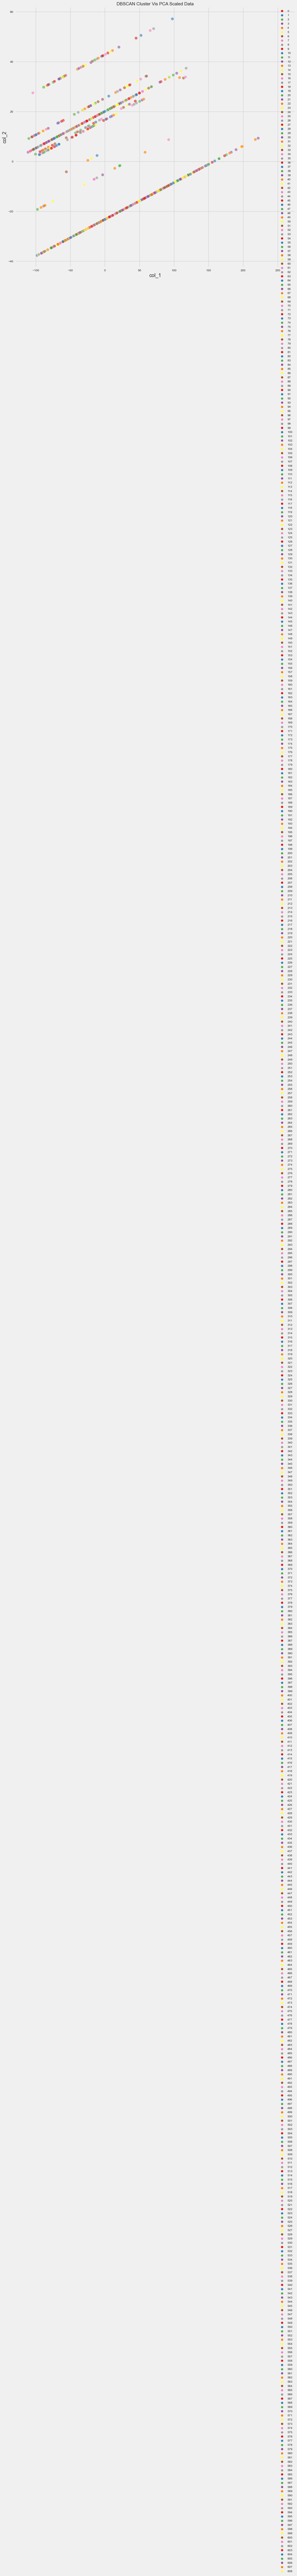

In [51]:
plt.figure(figsize = (15,15))
sns.scatterplot(clusters_pca_scale.iloc[:,0],clusters_pca_scale.iloc[:,1],hue=labels_pca_scale, palette='Set1', s=100, alpha=0.6).set_title('DBSCAN Cluster Vis PCA Scaled Data', fontsize=15)
plt.legend()
plt.show()

In [52]:
from sklearn.cluster import DBSCAN

In [71]:
import itertools

In [73]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

TypeError: 'list' object is not callable

In [111]:
from sklearn.preprocessing import StandardScaler

In [116]:
X = StandardScaler().fit_transform(df[['Depth_From','Depth_To','Bond Work Index','Abression Index','Rodmill Index','Drop Weight index','RQD','AxB']])
Data_DBSCAN = X

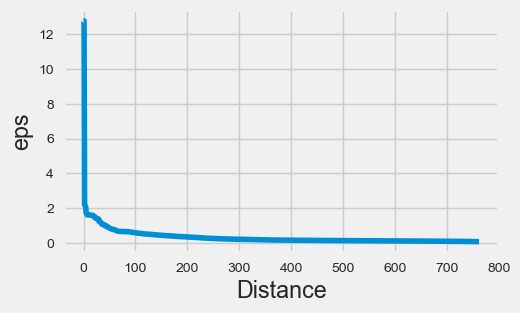

In [117]:
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors().fit(Data_DBSCAN)
distances, indices = nbrs.kneighbors(Data_DBSCAN,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()

In [107]:
from itertools import product

eps_values = np.arange(8,12.75,0.25) # eps values to be investigated
min_samples = np.arange(3,10) # min_samples values to be investigated

DBSCAN_params = list(product(eps_values, min_samples))

TypeError: 'list' object is not callable

In [118]:
#DBSCAN Algorithm
from sklearn.cluster import DBSCAN
dbs_1= DBSCAN(eps=1.1, min_samples=5)
results = dbs_1.fit(Data_DBSCAN).labels_

In [119]:
#Visualize DBSCAN clustering 
df_DBSCAN=Data_DBSCAN
df_DBSCAN['Cluster_id_DBSCAN']=results
print (df_DBSCAN['Cluster_id_DBSCAN'].value_counts())
sns.pairplot(df_DBSCAN,hue='Cluster_id_DBSCAN',palette='Dark2',diag_kind='kde')

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices